In [19]:
import os 
import healpy
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm
%matplotlib inline 

In [18]:
# global / irrelevant params
dpi = 800            # dots per inch (basically resolution) for plotting
figsize = 3.0, 2.0   # cmb plots figsize

# Contents

This notebook is a lightning introduction to a few critical libraries in `python` that you will undoubtedly use throughout your research career. We will look at

* Basics of `numpy`,
* Representing vectors and matrices as `numpy` objects,
* Plotting data with `matplotlib`,
* Random numbers and distributions.

Please feel free to email any questions to `jhomer@usm.lmu.de`.

## Basics of `numpy` 

`numpy` is a `python` library that allows you to represent data structures as arrays. 

It is the foundation of the majority of modern scientific computing in `python` and is certainly responsible for the design characteristics of modern machine learning libraries.

The most important object is the `np.ndarray`. You can represent almost anything with it, be it a vector, matrix or tensor. 

In [70]:
# what is an array? 
identity_matrix = np.array([[1.0, 0.0], [0.0, 1.0]])
identity_matrix

array([[1., 0.],
       [0., 1.]])

In [71]:
n = 2 ** 4
random_numbers = np.random.uniform(low=0.0, high=1.0, size=n)

In [73]:
random_numbers[1] # index the first element 

0.2467818303881666

In [75]:
random_numbers[:4] # take the first 4 elements

array([0.3356736 , 0.24678183, 0.08630101, 0.96602934])

In [76]:
random_numbers[::2] # select ALL elements, but every second element of them

array([0.3356736 , 0.08630101, 0.36700371, 0.08096069, 0.70409771,
       0.81591261, 0.49474082, 0.26916823])

In [77]:
random_numbers = random_numbers.reshape((4, 4))

In [78]:
random_numbers[:2,2:] # 2D indexing

array([[0.08630101, 0.96602934],
       [0.08096069, 0.16890749]])

### Rotate a vector in Cartesian space

Let's have a go with a function that takes in an array of 2D points `r` and rotates them by the angle `rotation`. 

All we do here is rotate a vector using a rotation matrix. This will be familiar if you have studied linear algebra. 


In [79]:
def rotate_points(r, rotation=45):
    """ rotate a 2D shape 'r' by 'rotation' degrees """
    # convert to radians
    rotation = np.radians(rotation) 
    # 2D rotation matrix
    rotation_matrix = np.array([[+np.cos(rotation), +np.sin(rotation)],
                                [-np.sin(rotation), +np.cos(rotation)]])
    # rotate the 2D points in r via a matrix multiplication
    rotated_r = np.matmul(rotation_matrix, r)
    return rotated_r

Next we draw a cross shape in cartesian space. This is a bit unusual but shows some useful `numpy` functions.

In [80]:
# Draw a cross shape in 2D cartesian space:
# This function generates 50 uniform points between 0 and 1. 
# I then reshape the arrays so that I can stack them into arrays of 2D coordinates.
a = np.linspace(-1.0, 1.0, 50).reshape(1, 50)
b = np.linspace(1.0, -1.0, 50).reshape(1, 50)

# these arrays are the 2D coordinates of the lines that make the cross shape. 
line = np.concatenate((a, b))
enil = np.concatenate((b, a[:,::-1])) # this is flipping the first line on the y axis
# here I concatenate them as one array, an array containing 50 * 2 points.
cross = np.concatenate((line, enil), axis=1)

Now we _unpack_ the rows of the cartesian coordinates for the shape into vectors `x` and `y`.  

We then rotate them by the angles shown below.

In [81]:
x, y = cross # x and y are now both of shape (1,50)
x_, y_ = rotate_points(cross, rotation=45)
x__, y__ = rotate_points(cross, rotation=234)

Now we plot the points to see the rotation, more on plotting later, but some basics:

* `fig, ax` are the figure and axes of the figure. This is what we plot stuff onto.

* `ax.scatter` takes arrays of coordinates to plot on the axes `ax`, the argument `s` is the marker size.

* `ax.legend` allows us to label the plot with the labels given in `ax.scatter`.

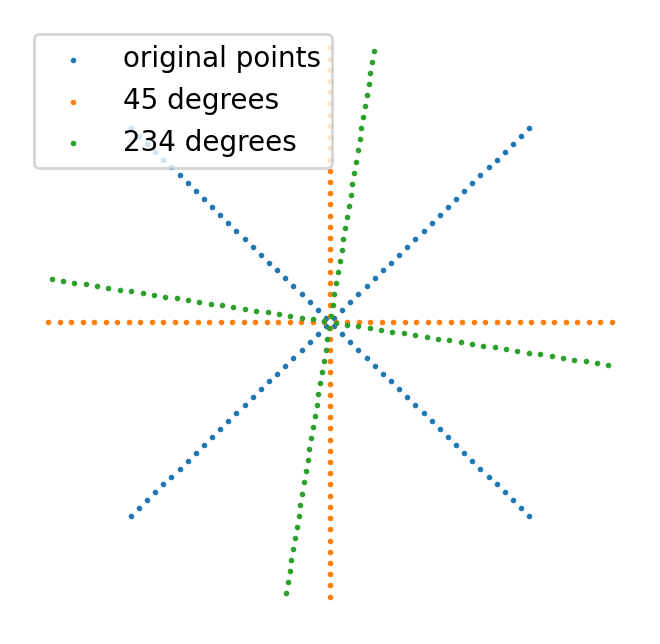

In [82]:
fig, ax = plt.subplots(dpi=200, figsize=(4.0, 4.0))

ax.scatter(x, y, s=1.0, label="original points")
ax.scatter(x_, y_, s=1.0, label="45 degrees")
ax.scatter(x__, y__, s=1.0, label="234 degrees")

plt.axis("off")
plt.legend()
plt.show()

### Generating random numbers

Computers generate 'approximately' random numbers, based off a *seed* number. 

This seed number is operated on with classical operations to generate approximately random numbers.

This seed allows you to access the same random numbers when running the same process again, this is good if you want to share a process with someone!

In [83]:
# np.random.seed(79) # run this cell twice, comment this out, then run it twice again
xyz = np.random.uniform(low=0.0, high=1.0, size=(3,)) # e.g. a cartesian vector (x, y, z) sampled from a uniform box distribution
xyz

array([0.10102074, 0.71258455, 0.15154588])

Another useful way of generating random numbers throughout a script that are the same for each run of the script, you can pass a `numpy` random number generator object (RNG) and sample from it. 

Note that we expect the two calls of `random()` to be different, but the two calls will return the same numbers separately because they derive from the same RNG.

In [17]:
rng = np.random.default_rng(123456789)
print(rng.random(4))
print(rng.random(4))

[0.02771274 0.90670006 0.88139355 0.62489728]
[0.79071481 0.82590801 0.84170584 0.47172795]


A good practice would be to set the `rng` at the top of the script and sample exclusively from it thereafter.

Let's sample some random numbers from a Gaussian distribution with mean $\mu=0$ and standard deviation $\sigma=1$.

In [84]:
n_samples = 100000
gaussian_noise = np.random.normal(loc=0.0, scale=1.0, size=(n_samples,))
uniform_noise = np.random.uniform(low=0.0, high=1.0, size=(n_samples,))

Now let's histogram these numbers to see how they are distributed.

The argument `density` just normalises the distributions.

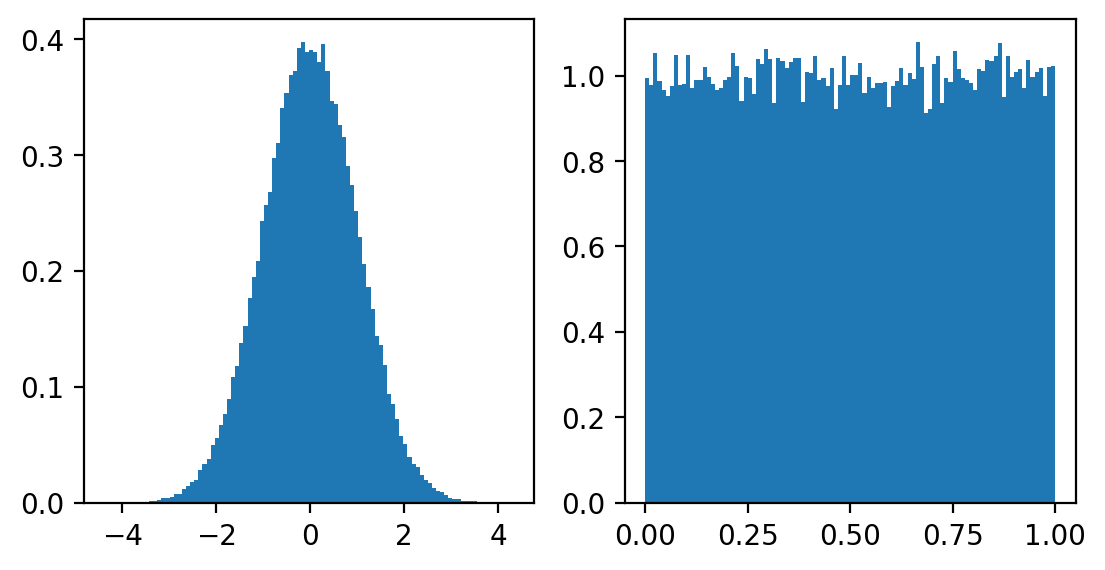

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.4, 3.2), dpi=200)
ax1.hist(gaussian_noise, bins=100, density=True)
ax2.hist(uniform_noise, bins=100, density=True)
plt.show()

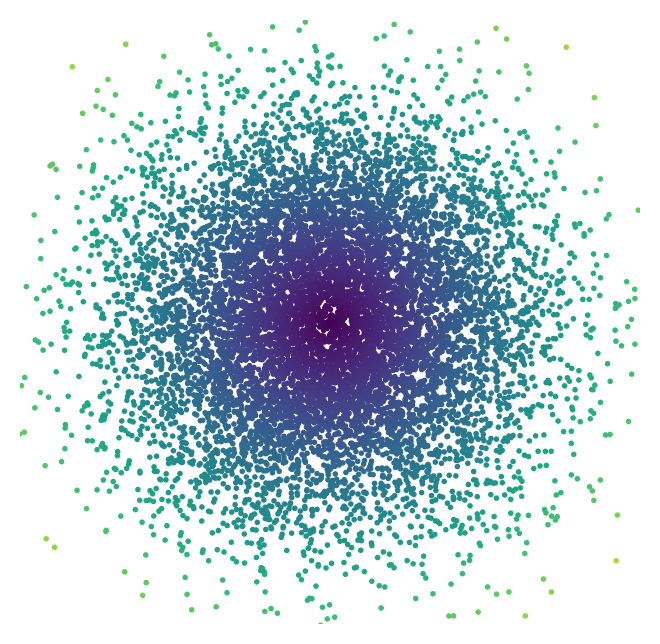

In [86]:
# 2 dimensions, 10000 points
random_points = np.random.normal(size=(2,10000)) 

# unpack the rows corresponding to each dim into separate arrays
x, y = random_points 

# radii of each point, to colour them in the plot
random_points_radii = np.sqrt(x ** 2 + y ** 2) 

fig, ax = plt.subplots(dpi=200, figsize=(4.0, 4.0))
ax.scatter(x, y, c=random_points_radii, s=1.0) # c stands for colour!
ax.set_xlim(-3.0, 3.0)
ax.set_ylim(-3.0, 3.0)
plt.axis("off")
plt.show()

### Multidimensional Gaussians
Let's sample from a more realistic Gaussian distribution with a covariance matrix $C$ and mean $\mu$.

We start by generating a random covariance matrix, you can do this by multiplying a random matrix by its tranpose

In [87]:
S = np.random.uniform(size=(2,2)) 
covariance = np.matmul(S, S.transpose())
covariance 

array([[1.06414956, 0.60133698],
       [0.60133698, 0.34102937]])

Now we use a function from `numpy`'s `random` module to define and sample from a multi-dimensional Gaussian

In [88]:
mean = np.zeros((2,)) # zero mean is nicer to plot :)

nsamples = 2000

samples = np.random.multivariate_normal(mean=mean, cov=covariance, size=(nsamples,))

Now let's plot this, we will use a contour plot...

In [89]:
from scipy.stats import multivariate_normal

# this is a grid of regularly space points [-1.0, 1.0] with spacing 0.01
x, y = np.mgrid[-1.0:1.0:0.01, -1.0:1.0:0.01]

random_variable = multivariate_normal(mean=mean, cov=covariance)

grid = np.dstack((x,y)) # concatenate along new 3rd axis of x, y arrays

Now we use the `pdf` function of the multivariate normal distribution evaluated at each point in the 2D grid we defined above. 

This is, of course, the probability density function $p(x)$ for a multi-dimensional Gaussian you are probably familiar with

In [90]:
multidim_gaussian_pdf = random_variable.pdf(grid)

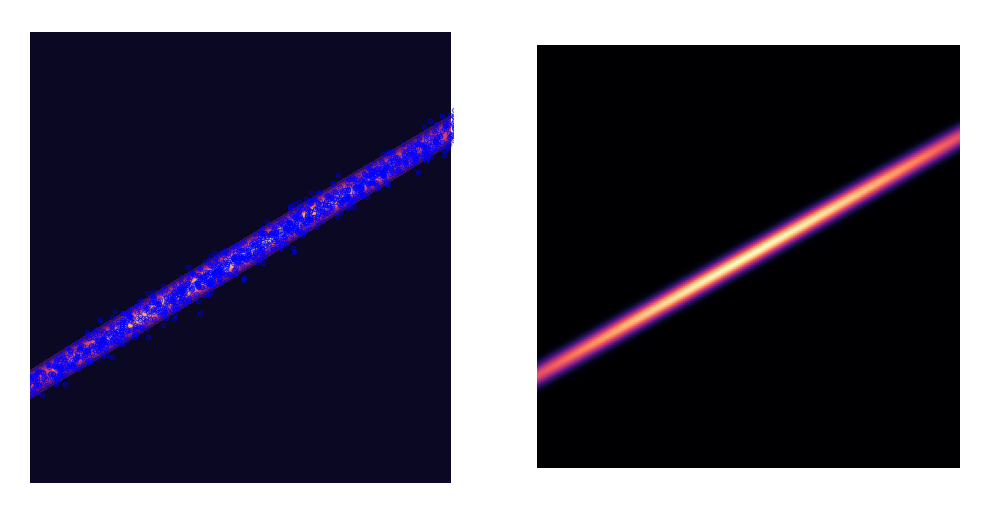

In [91]:
x_, y_ = samples.transpose() # unpack the x, y dimensions of the sample coordinates

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, dpi=300, figsize=(4.0,2.0))

# contour plot for grid x, y coloured by the multidim pdf: pdf(r=(x,y)) 
ax1.contourf(x, y, multidim_gaussian_pdf, cmap="magma")
# scatterplot from before, zorder just plots the scatter on top, alpha is the transparency of the points, s the size
ax1.scatter(x_, y_, zorder=1, s=0.1, c="b", alpha=0.6)
ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)

# imshow: show a 2D array as an image!
ax2.imshow(np.rot90(multidim_gaussian_pdf, 1), cmap="magma") # have to rotate because imshow starts x,y from top left corner!

ax1.axis("off")
ax2.axis("off")
plt.show()

### Plotting some distributions

Here is another example of `numpy` and `matplotlib` usage, for plotting a diagram given in the lecture notes.

First we chooose a mean $\mu$ and variance $\sigma$ pair of values

In [92]:
mu = 1.0
sigma = 0.4

In [93]:
sigma_g = np.sqrt(np.log(1 + sigma ** 2))
mu_g = np.log(mu) - 0.5 * sigma_g ** 2 

In [94]:
N_x = 1000 # number of points on our x-axis

Here we are just calculating some limits for the plot down below

In [95]:
x_min = mu - 3.0 * sigma
x_max = mu + 4.0 * sigma

Here we create a step size $\text{d}x$ and an array of $x$-axis values `x_values`

In [97]:
dx = (x_max - x_min)/(N_x - 1)
x_values = np.arange(x_min, x_max + 0.5 * dx, dx)

Here we put all the $x$-axis points through the Gaussian pdf $p(x)$ 

$$ p_{Gauss}(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp( -\frac{(x - \mu)^2}{2\sigma^2} ) $$

In [98]:
gaussian_pdf = np.exp(-0.5*(x_values - mu)**2/sigma**2)/np.sqrt(2.0*np.pi*sigma**2)

here a very important function in `numpy` is used, `np.where`. This accesses all the 

In [99]:
log_normal_pdf = 0.0 * x_values

indxs = np.where(x_values > 0)[0]

Now we use the pdf equation for a log-normal random variable $x$

$$ p_{Gauss}(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp( -\frac{(x - \mu)^2}{2\sigma^2} ) $$

In [100]:
log_normal_pdf[indxs] = np.exp(-0.5 * (np.log(x_values[indxs]) - mu_g) ** 2 / sigma_g ** 2) / np.sqrt(2.0 * np.pi * sigma_g ** 2) / x_values[indxs]
uniform_pdf = 0.0 * x_values

Again we use `np.where` to access the indices of the $x$-axis values that satisfy the condition shown below

In [101]:
condition = (x_values > mu - np.sqrt(3.0) * sigma) & (x_values < mu + np.sqrt(3.0) * sigma)
indxs = np.where(condition)[0]

uniform_pdf[indxs] = 0.5/(np.sqrt(3.)*sigma)

and now we plot... 

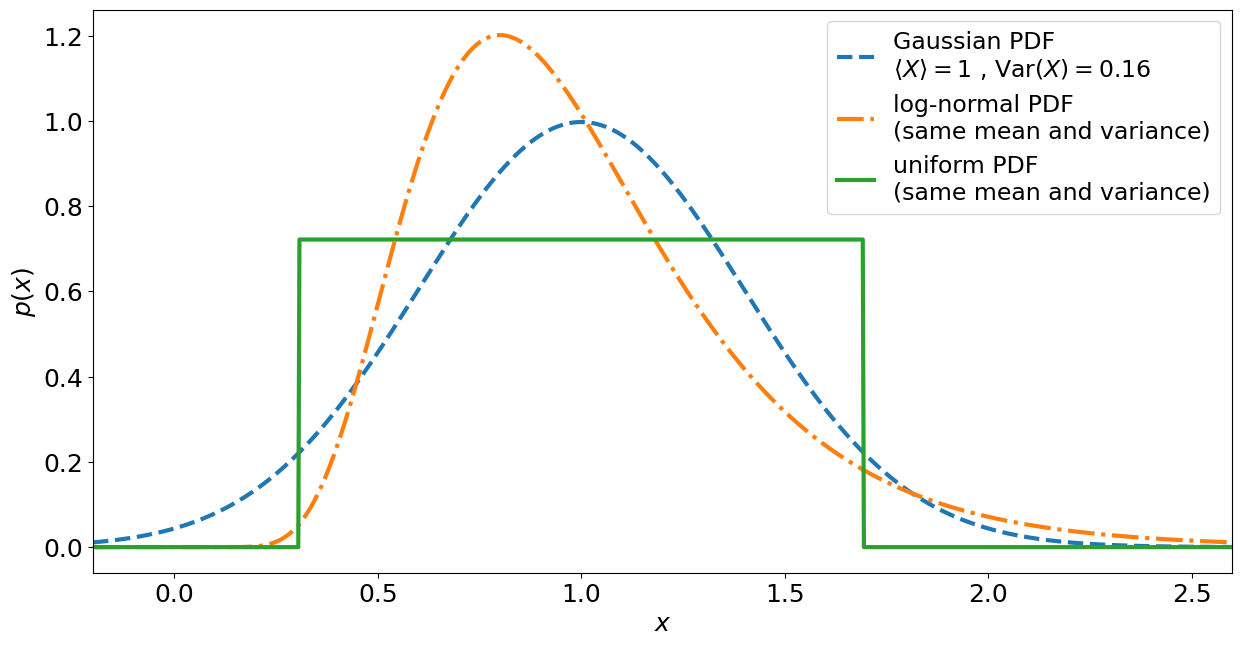

In [102]:
plt.figure(figsize=(12.8, 6.4), dpi=100)

# change the size of the axis tick marks (purely aesthetic)
plt.xticks(size=18)
plt.yticks(size=18)

# set the interval on the x-axis that the plot will show
plt.xlim(x_min, x_max)

# plot the pdfs
plt.plot(x_values, gaussian_pdf, linewidth=3, linestyle='dashed', label="Gaussian PDF\n"+r"$\left<X\right> = 1$ , $\mathrm{Var}(X) = 0.16$")
plt.plot(x_values, log_normal_pdf, linewidth=3, linestyle='-.', label="log-normal PDF\n(same mean and variance)")
plt.plot(x_values, uniform_pdf, linewidth=3, linestyle='solid', label="uniform PDF\n(same mean and variance)")

plt.legend(fontsize=17, handlelength=1.6)

plt.xlabel(r"$x$", size=18)
plt.ylabel(r"$p(x)$", size=18)

# adjust the plot within the figure (purely aesthetic)
plt.subplots_adjust(left=0.09, right=0.98, bottom=0.1, top=0.98)

# save the figure, pro tip: save as pdf for insertion into lab reports / papers.
plt.savefig("PDF_examples.pdf")

### Future
What would you like to see in these notebooks for future tutorials?

e.g. Machine learning in [`jax`](https://github.com/google/jax), [`PyTorch`](https://github.com/pytorch/pytorch)... 

#### Great resources

* GitHub : https://github.com/ - where everyone hosts their code to share with other researchers.
* StackOverflow: where questions and answers meet!
* `matplotlib`: https://jakevdp.github.io/PythonDataScienceHandbook/
* `healpy`: https://healpy.readthedocs.io/